# Bottom pressure


We are interested in signals that predict the onset and then measure the progress of the next eruption at Axial Seamount. 


## Data quality overview

### Summary


There are two major data quality issues and lots of bloat in the NetCDF file. The data itself looks good on a tidal time scale and on a wave time scale the noise is comparable to signal.


### Detail


- The data are simple: Just timestamps and pressures: At 20 samples per second
- In what follows we consider an 8-day duration data file. 
    - This particular file starts out at one sample per second and then soon switches gears to 20 samples/sec: **Data quality issue 1**
- Zoomed out the pressure follows a tidal signal with amplitude of a couple of meters
    - The tidal signal is frequently interrupted by brief (a few samples long) spikes 
    - These go to lower pressure, less by a meter or two. 
    - This looks to me like a capacitor discharge dropping a voltage spike into an ADC
    - It is clearly random and not a real signal. 
    - We see about five per hour on average. **Data quality issue 2**
- Zooming in to very fine time resolution the signal has vertical structure (comparable to wave motion) and noise. 
    - These are of comparable vertical scale, about 4 cm. 


There are 15 different Data Variables of which only two -- time and pressure -- are sensor data. 
I calculate each observation (again at 20 per second) requires 125 bytes where time and pressure require only 12 bytes. 
If I did that right 125 bytes x 8 days x 20 samples / second is 1.7GB but the NetCDF file is only 0.5GB for 12 million observations; 
so either the file is compressed or I'm just wrong on some count.

In [1]:
# mini-source control
# copied to tilt on 24-SEP-2020

pangeo_jupyter = False

import os
import sys
import time

home_dir = os.getenv("HOME")
this_dir = home_dir + '/chlorophyll/'

if pangeo_jupyter: data_dir = home_dir + '/data/'
else: data_dir = '/data/'

print('\nJupyter Notebook running Python {}'.format(sys.version_info[0]))
print('the data directory is', data_dir, '\n')

# Some notes on writing movies (ongoing project)
#     This may be necessary on Pangeo: conda install -c conda-forge ffmpeg -y -q       
#       ... noting that -y skips dialogs; -q reduces stdout clutter
#     Note: On Pangeo `which ffmpeg` returns `/srv/conda/envs/notebook/bin/ffmpeg`
#       ... plt.rcParams['animation.ffmpeg_path'] = '/srv/conda/envs/notebook/bin/ffmpeg' 
#       ... (matplotlib must see the movie writer 'ffmpeg')

from matplotlib import pyplot as plt
from matplotlib import colors as mplcolors   # map data values to colors

import warnings
# turn off warnings using: warnings.filterwarnings("ignore")

import numpy as np
from numpy import datetime64 as dt64, timedelta64 as td64
import pandas as pd
import xarray as xr

# doy = day of year, indexed from 1 (1-JAN)
# Day of year calculated directly from a datetime64
def doy(theDatetime): return 1 + int((theDatetime - dt64(str(theDatetime)[0:4] + '-01-01')) / td64(1, 'D'))
def dt64_from_doy(year, doy): return dt64(str(year) + '-01-01') + td64(doy-1, 'D')


Jupyter Notebook running Python 3
the data directory is /data/ 



In [134]:
ds=xr.open_dataset(data_dir + 'botpt/botpt.nc')
ds

<xarray.Dataset>
Dimensions:                      (obs: 12724319)
Coordinates:
  * obs                          (obs) int32 0 1 2 ... 12724317 12724318
Data variables:
    preferred_timestamp          (obs) object ...
    sensor_id                    (obs) object ...
    bottom_pressure_qc_executed  (obs) uint8 ...
    date_time_string             (obs) object ...
    port_timestamp               (obs) datetime64[ns] ...
    press_trans_temp             (obs) float64 ...
    deployment                   (obs) int32 ...
    bottom_pressure_qc_results   (obs) uint8 ...
    id                           (obs) |S36 ...
    ingestion_timestamp          (obs) datetime64[ns] ...
    bottom_pressure              (obs) float32 ...
    internal_timestamp           (obs) datetime64[ns] ...
    time                         (obs) datetime64[ns] ...
    time_sync_flag               (obs) object ...
    driver_timestamp             (obs) datetime64[ns] ...
Attributes:
    node:                            MJ03B
    comment:                         
    publisher_email:                 
    sourceUrl:                       http://oceanobservatories.org/
    collection_method:               streamed
    stream:                          botpt_nano_sample
    featureType:                     point
    creator_email:                   
    publisher_name:                  Ocean Observatories Initiative
    date_modified:                   2020-08-11T12:52:50.977441
    keywords:                        
    cdm_data_type:                   Point
    references:                      More information can be found at http://...
    Metadata_Conventions:            Unidata Dataset Discovery v1.0
    date_created:                    2020-08-11T12:52:50.977430
    id:                              RS03ASHS-MJ03B-09-BOTPTA304-streamed-bot...
    requestUUID:                     2d299be8-1321-4b2b-8b74-fbf136458209
    contributor_role:                
    summary:                         Dataset Generated by Stream Engine from ...
    keywords_vocabulary:             
    institution:                     Ocean Observatories Initiative
    naming_authority:                org.oceanobservatories
    feature_Type:                    point
    infoUrl:                         http://oceanobservatories.org/
    license:                         
    contributor_name:                
    uuid:                            2d299be8-1321-4b2b-8b74-fbf136458209
    creator_name:                    Ocean Observatories Initiative
    title:                           Data produced by Stream Engine version 1...
    sensor:                          09-BOTPTA304
    standard_name_vocabulary:        NetCDF Climate and Forecast (CF) Metadat...
    acknowledgement:                 
    Conventions:                     CF-1.6
    project:                         Ocean Observatories Initiative
    source:                          RS03ASHS-MJ03B-09-BOTPTA304-streamed-bot...
    publisher_url:                   http://oceanobservatories.org/
    creator_url:                     http://oceanobservatories.org/
    nodc_template_version:           NODC_NetCDF_TimeSeries_Orthogonal_Templa...
    subsite:                         RS03ASHS
    processing_level:                L2
    history:                         2020-08-11T12:52:50.977322 generated fro...
    time_coverage_start:             2017-08-15T00:10:37
    time_coverage_end:               2017-08-22T23:59:59.950000
    time_coverage_resolution:        P0.05S
    geospatial_lat_min:              45.93363
    geospatial_lat_max:              45.93363
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       0.1
    geospatial_lon_min:              -130.01368
    geospatial_lon_max:              -130.01368
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.1
    geospatial_vertical_units:       meters
    geospatial_vertical_resolution:  0.1
    geospatial_vertic

In [142]:
tmp=[]
nplots = 40
datablock = 72000
for i in range(nplots):
    tmp.append(ds.isel(obs=slice(2000000 + i*datablock, 2000000 + i*datablock + datablock)).bottom_pressure)

fig, axs = plt.subplots(nplots, 1, figsize=(36, 12*nplots), tight_layout=True)

for i in range(nplots):
    axs[i].plot(tmp[i], color='k')
    axs[i].set(ylim = (2274, 2278))


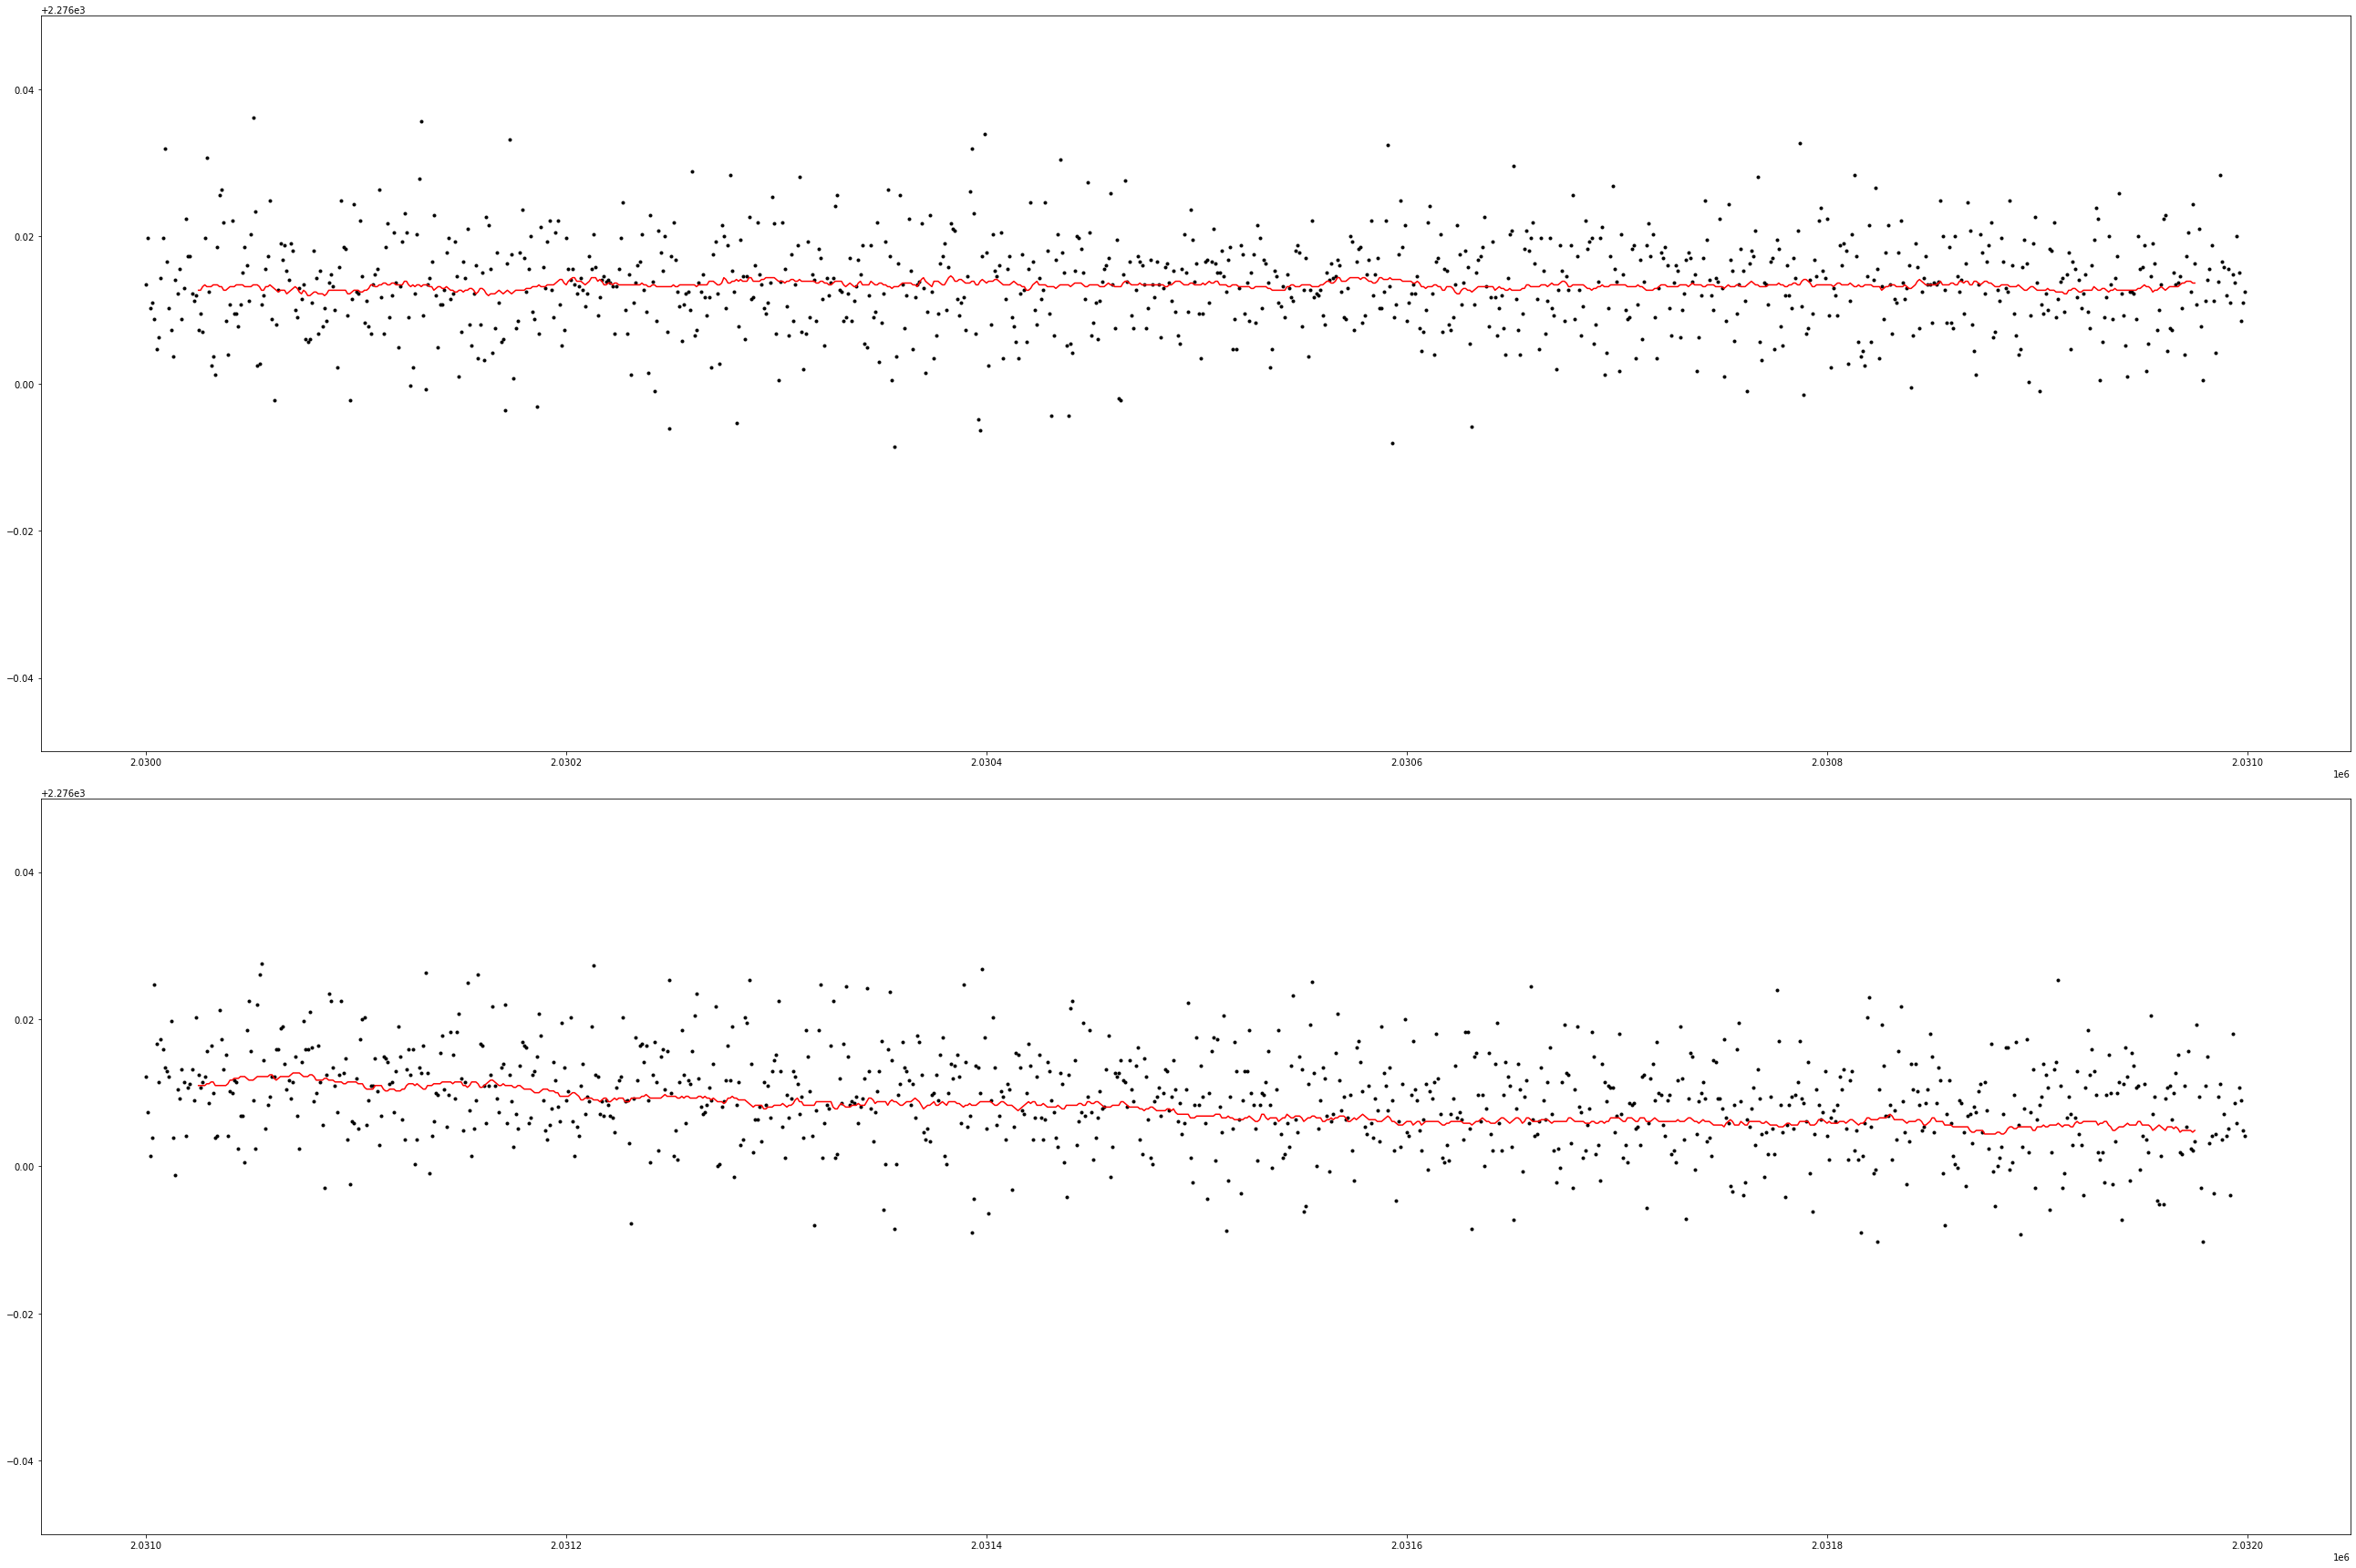

In [167]:
tmpsub=[]
tmproll=[]
nobs=50
nplots = 2
datablock = 1000
for i in range(nplots):
    tmpsub.append(tmp[0].isel(obs=slice(30000 + i*datablock, 30000 + i*datablock + datablock)))
    tmproll.append(tmp[0].isel(obs=slice(30000 + i*datablock, 30000 + i*datablock + datablock)).rolling(obs=nobs, center=True).mean())

fig, axs = plt.subplots(nplots, 1, figsize=(36, 12*nplots), tight_layout=True)

for i in range(nplots):
    axs[i].plot(tmproll[i].obs, tmproll[i], color='r')
    axs[i].scatter(tmpsub[i].obs, tmpsub[i], color='k', marker='.')
    axs[i].set(ylim = (2275.95, 2276.05))

## Unpacking this dataset


How many observations? 


```
len(ds.time)
```

results in `12724319`. This is (mostly) at 20 samples per second. 


What are the Data Variables?


```
ds.data_vars
```

gives


```
Data variables:
    preferred_timestamp          (obs) object ...
    sensor_id                    (obs) object ...
    bottom_pressure_qc_executed  (obs) uint8 ...
    date_time_string             (obs) object ...
    port_timestamp               (obs) datetime64[ns] ...
    press_trans_temp             (obs) float64 ...
    deployment                   (obs) int32 ...
    bottom_pressure_qc_results   (obs) uint8 ...
    id                           (obs) |S36 ...
    ingestion_timestamp          (obs) datetime64[ns] ...
    bottom_pressure              (obs) float32 ...
    internal_timestamp           (obs) datetime64[ns] ...
    time                         (obs) datetime64[ns] ...
    time_sync_flag               (obs) object ...
    driver_timestamp             (obs) datetime64[ns] ...
```

How many bytes per sample for these, in sum?


```
sum_bytes = 5 * np.dtype('datetime64').itemsize     # dt64 is 
sum_bytes += 1                                      # uint8 is one byte
sum_bytes += 4*8                                    # object is one byte
sum_bytes += 1*8                                    # float64 is 8 bytes
sum_bytes += 36                                     # |S36 is 36 bytes
sum_bytes += 4                                      # float32 is 4 bytes
sum_bytes += 4                                      # int32 is 4 bytes

print(len(ds.time)*sum_bytes, 'at bytes per obs = ', sum_bytes, 'not including obs overhead')
# how to get the size of some type in bytes: 

print(np.dtype('datetime64').itemsize)
print(np.dtype('uint8').itemsize)
print(np.dtype('object').itemsize)
print(np.dtype('float64').itemsize)
print(np.dtype('|S36').itemsize)
print(np.dtype('float32').itemsize)
print(np.dtype('int32').itemsize)
```

produces this output: 


```
1590539875 at bytes per obs =  125 not including obs overhead

8
1
8
8
36
4
4
```


### How to examine the XArray DataSet for content?


`dir(ds)` gives a lot of attributes; so here is a subset of these that are useful.


```
 'attrs',                                                      lists the attributes section

 'bottom_pressure'                                             the data
 'bottom_pressure_qc_executed'                                             ...what quality control?
 'bottom_pressure_qc_results'
 
 'coords',                                                     just 'obs'
 'data_vars'                                                   Data Variables. Note 'time' is present in addition to bottom_pressure (and other things)

 'dims'                                                        just 'obs'

 'geospatial_...                                               as expected

 'indexes'                                                     0, 1, ...
 'info'                                                        yet another way of seeing all these attributes
 'keys'                                                        and yet again: the dataset dictionary
 
 'lat'                                                           45.93363
 'lon'                                                         -130.01368

 'obs'                                                         obs

 'sensor'                                                     '09-BOTPTA304'

 'source'                                                     'RS03ASHS-MJ03B-09-BOTPTA304-streamed-botpt_nano_sample'

 'standard_name_vocabulary'                                   'NetCDF Climate and Forecast (CF) Metadata Convention Standard Name Table 29'

 'swap_dims'                                                  Useful to keep in mind for going to time rather than obs

 'time'                                                       treated as a data variable
 'time_coverage_end'                                          time range is Aug 15 - 22 2017; 7 days 13 hrs > consistent with 13 millions samples
 'time_coverage_resolution'                                   .05 seconds
 'time_coverage_start'

 'title'
 'to_<other_format>'                                           re-casting, includes zarr as an option

 'values'                                                      useful, same as 'var'
 'var'                                                         useful, same as 'values'
 'variables'                                                   unreadable
```

In [168]:
ds.time[0:10] # suspicious one sample per second, not 20...

<xarray.DataArray 'time' (obs: 10)>
array(['2017-08-15T00:10:37.000000000', '2017-08-15T00:10:38.000000000',
       '2017-08-15T00:10:39.000000000', '2017-08-15T00:10:40.000000000',
       '2017-08-15T00:10:41.000000000', '2017-08-15T00:10:42.000000000',
       '2017-08-15T00:10:43.000000000', '2017-08-15T00:10:44.000000000',
       '2017-08-15T00:10:45.000000000', '2017-08-15T00:10:46.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * obs      (obs) int32 0 1 2 3 4 5 6 7 8 9
Attributes:
    long_name:      time
    standard_name:  time
    axis:           T

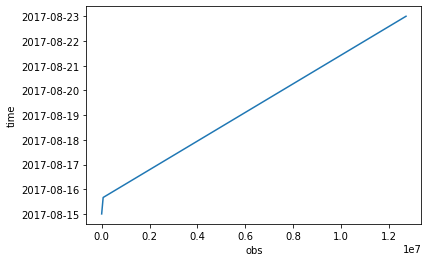

In [169]:
# Smoking gun: Sometimes the data are one sample per second, sometimes 20 samples per second
ds.time.plot()

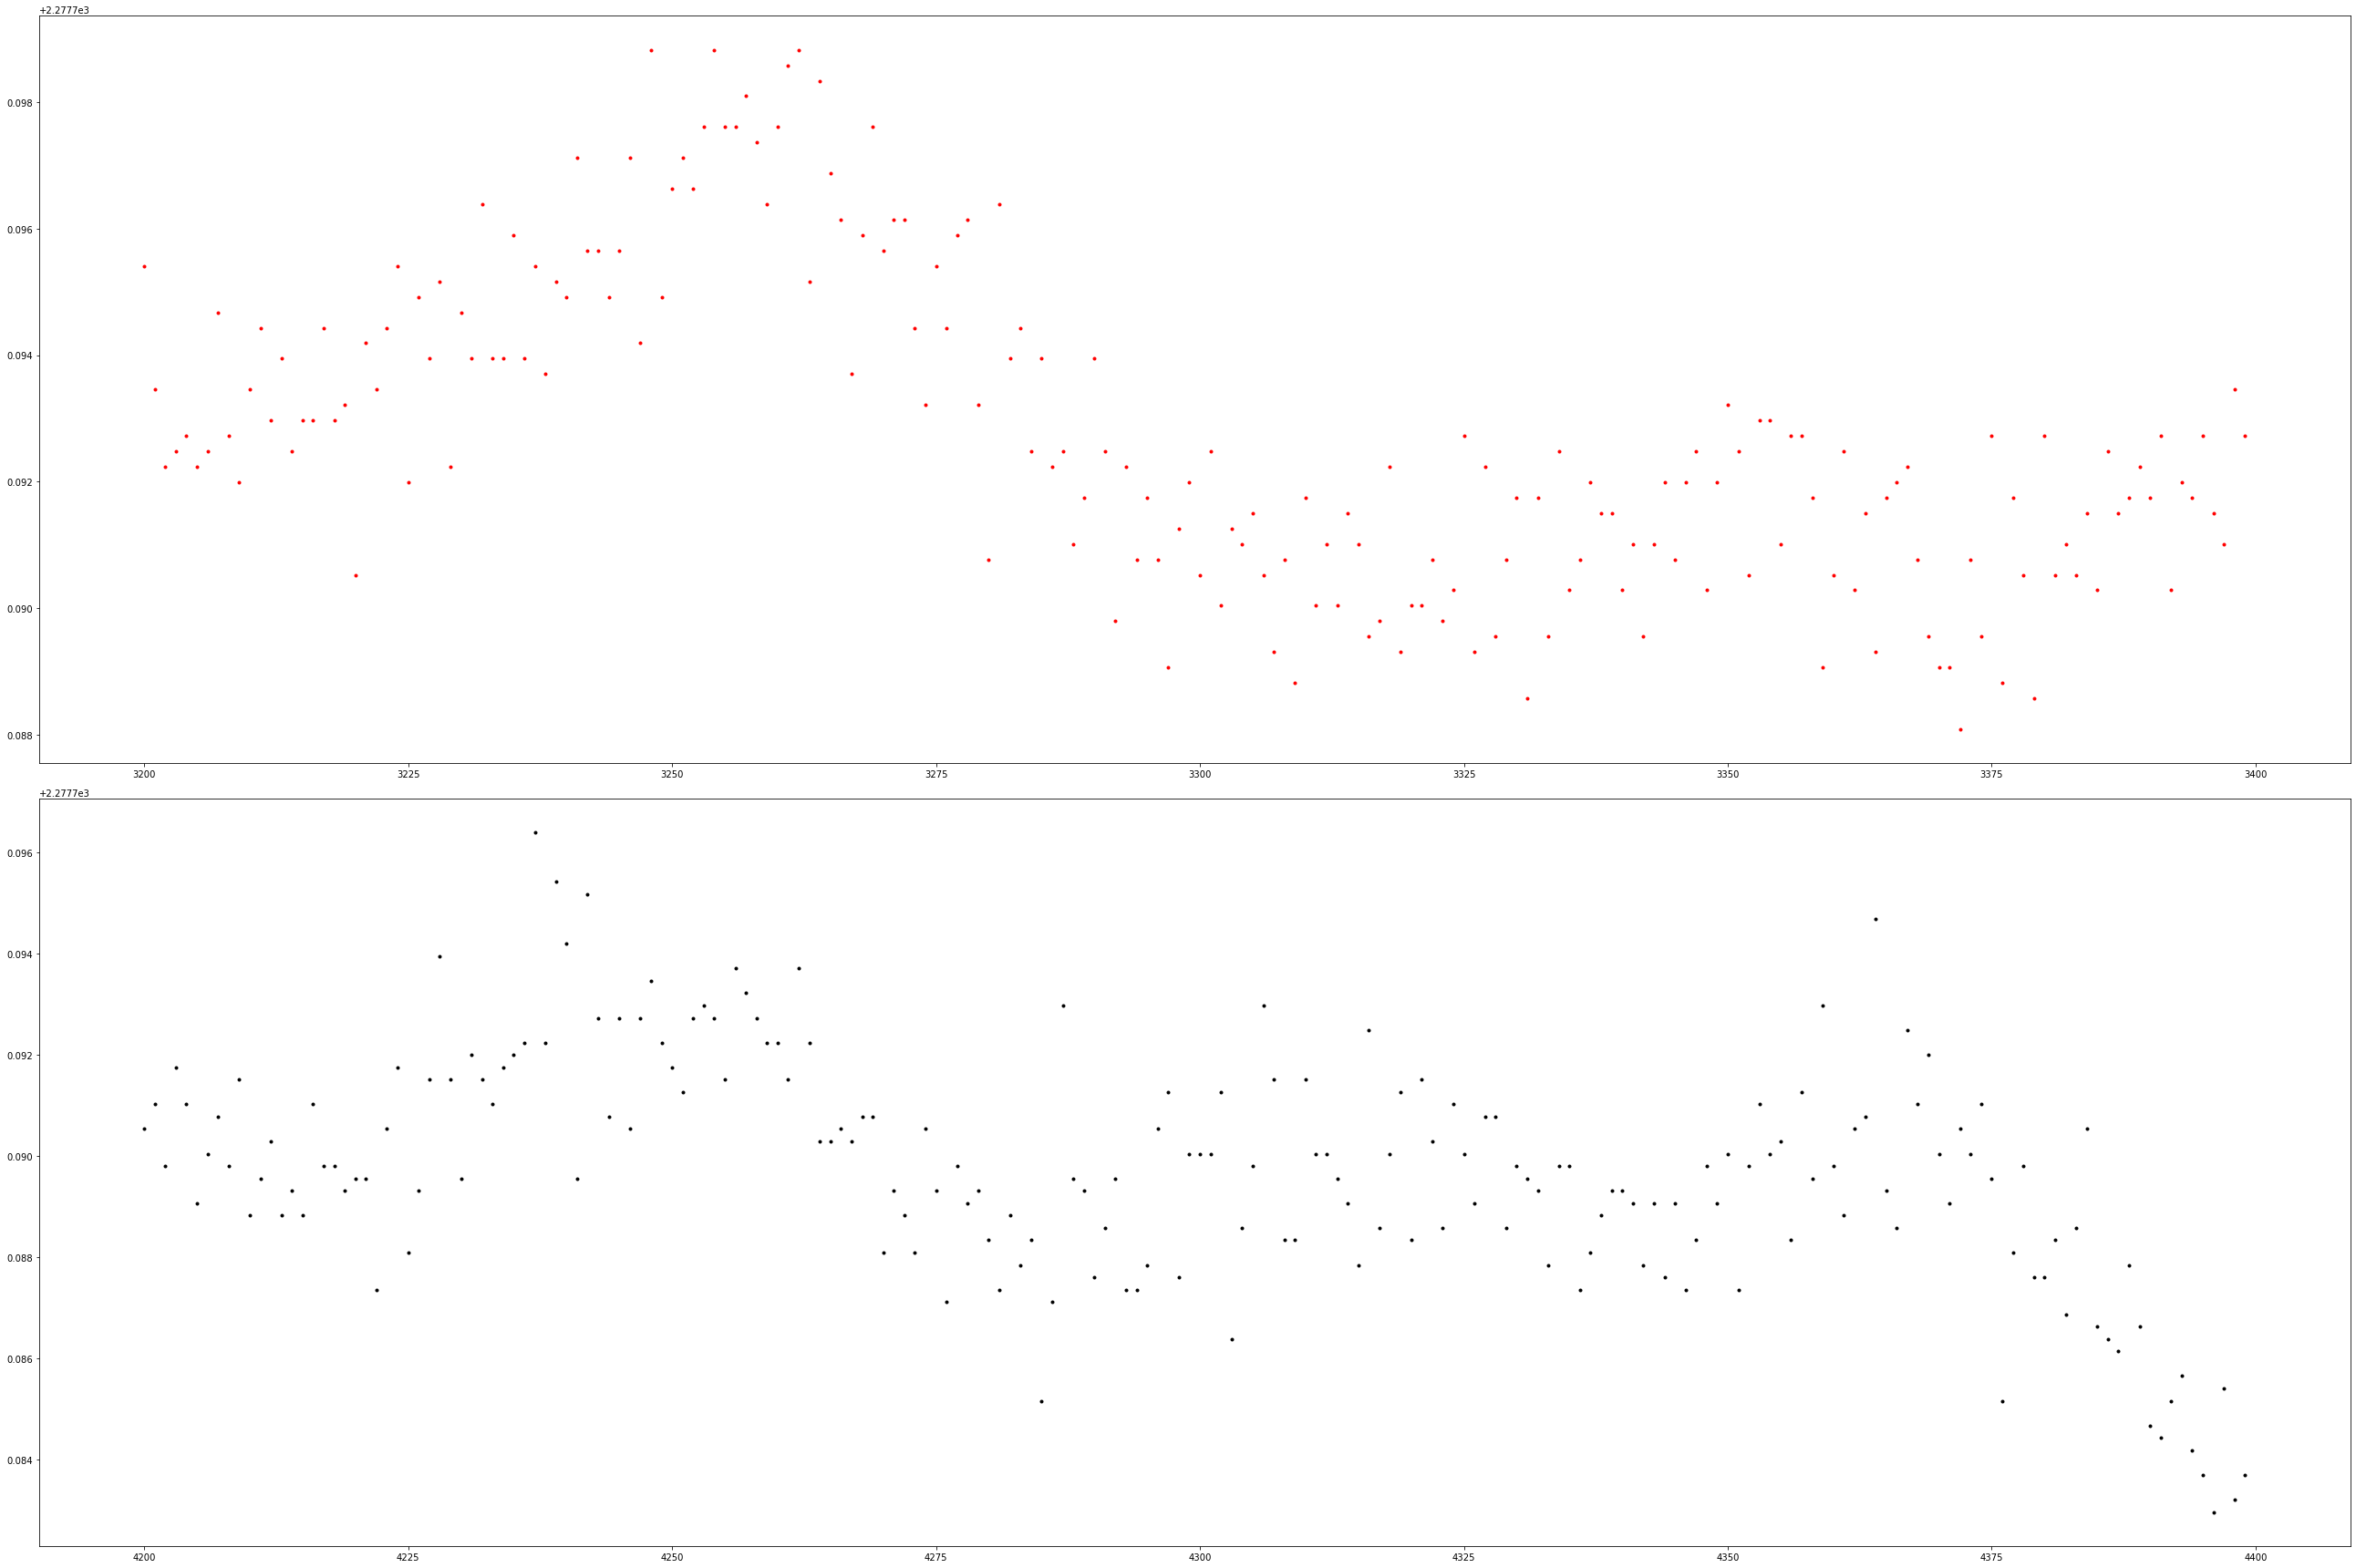

In [115]:
fig, axs = plt.subplots(2, 1, figsize=(36, 24), tight_layout=True)

tmp1 = tmp[0].isel(obs=slice(3200,3400))
tmp2 = tmp[0].isel(obs=slice(4200,4400))

axs[0].scatter(tmp1.obs, tmp1, marker='.', color='r')
axs[1].scatter(tmp2.obs, tmp2, marker='.', color='k')

# Suspect now that we see this is one sample per second